In [3]:
import numpy as np
import csv

data = None
with open('board_data.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

data = np.array(data[1:])
display(data)

array([['51', 'FAA.K.FGH.KLFGHXXLBBBJ.L..IJCCDDIEE.'],
       ['50', '..HAAA..HJ..XXIJ.KBBICCKFGDD.KFGEE..'],
       ['49', 'AAAJKLGBBJKLG.XXKLCCI....HIDD..HEEFF'],
       ...,
       ['02', '...A.....A..XX.A....................'],
       ['02', '....A.....A.XX..A...................'],
       ['01', '............XX......................']], dtype='<U36')

In [4]:
x_data = data[:,1]

def string_to_list(s):
	return list(s)

x_data_unshaped = np.array([string_to_list(s) for s in x_data])

x_data = x_data_unshaped.reshape(476118, 36)

to_ascii = np.vectorize(ord)
x_data = to_ascii(x_data)

# def split_string(string):
# 	return np.array([x for x in list(string)])

# split_func = np.vectorize(split_string)
# x_data = split_func(x_data_unsplit)

display(x_data.shape)

(476118, 36)

In [5]:
display(x_data)

array([[70, 65, 65, ..., 69, 69, 46],
       [46, 46, 72, ..., 69, 46, 46],
       [65, 65, 65, ..., 69, 70, 70],
       ...,
       [46, 46, 46, ..., 46, 46, 46],
       [46, 46, 46, ..., 46, 46, 46],
       [46, 46, 46, ..., 46, 46, 46]])

In [6]:
y_data = data[:,0]

y_data = y_data.astype(int)
display(y_data)

array([51, 50, 49, ...,  2,  2,  1])

In [7]:
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

2024-06-25 13:20:54.250678: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.7, test_size = 0.3)

In [9]:
import matplotlib.pyplot as plt

def train_and_evaluate(model, train_x, train_y, val_x, val_y, epochs=20):
    model.compile(loss='MeanSquaredError', optimizer='adam', metrics=['mean_squared_error'])

    history = model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs = epochs)

    fig, axs = plt.subplots(1,2,figsize=(20,5))

    for i, metric in enumerate(['loss', 'mean_squared_error']):
        axs[i].plot(history.history[metric])
        axs[i].plot(history.history['val_'+metric])
        axs[i].legend(['training', 'validation'], loc='best')

        axs[i].set_title('Model '+metric)
        axs[i].set_ylabel(metric)
        axs[i].set_xlabel('epoch')

    plt.show()

Epoch 1/20
10416/10416 [==============================] - 16s 1ms/step - loss: 13.4952 - mean_squared_error: 13.4952 - val_loss: 11.6901 - val_mean_squared_error: 11.6901
Epoch 2/20
10416/10416 [==============================] - 15s 1ms/step - loss: 10.9541 - mean_squared_error: 10.9541 - val_loss: 14.5743 - val_mean_squared_error: 14.5743
Epoch 3/20
10416/10416 [==============================] - 15s 1ms/step - loss: 10.4605 - mean_squared_error: 10.4605 - val_loss: 10.0290 - val_mean_squared_error: 10.0290
Epoch 4/20
10416/10416 [==============================] - 15s 1ms/step - loss: 10.1808 - mean_squared_error: 10.1808 - val_loss: 9.9395 - val_mean_squared_error: 9.9395
Epoch 5/20
10416/10416 [==============================] - 15s 1ms/step - loss: 9.9852 - mean_squared_error: 9.9852 - val_loss: 9.9092 - val_mean_squared_error: 9.9092
Epoch 6/20
10416/10416 [==============================] - 15s 1ms/step - loss: 9.8151 - mean_squared_error: 9.8151 - val_loss: 9.5051 - val_mean_square

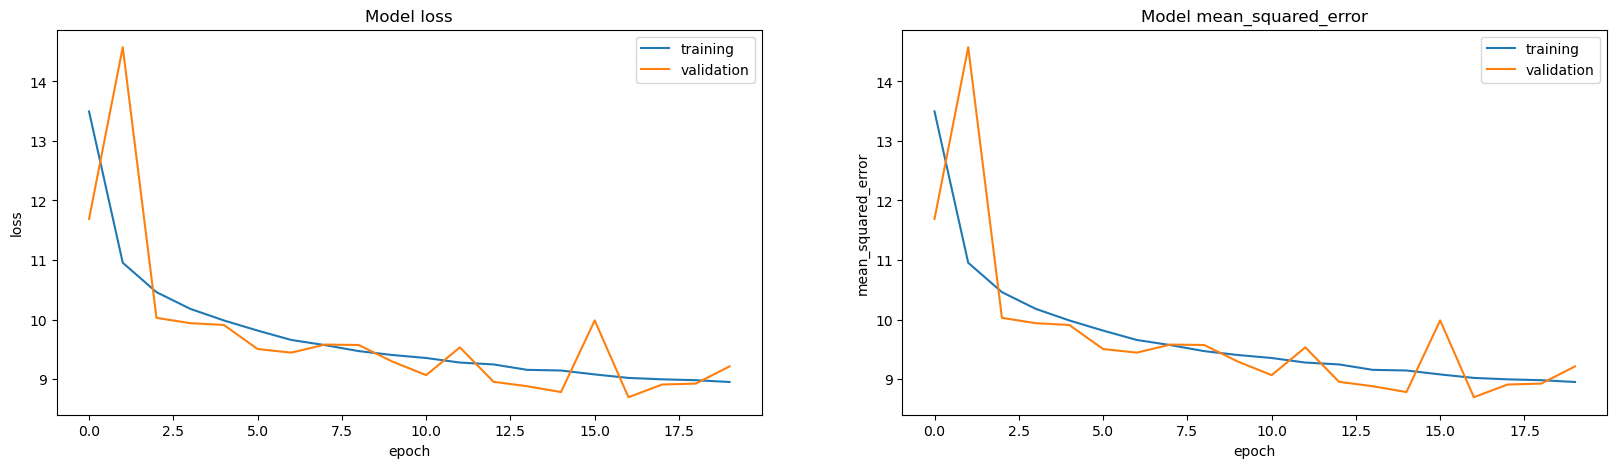

In [11]:

model = models.Sequential()

model.add(layers.Dense(units=36, activation='relu', input_shape = (36,)))
model.add(layers.Dense(units=72, activation='relu'))
model.add(layers.Dense(units=1, activation='relu'))

train_and_evaluate(model, x_train, y_train, x_test, y_test)

In [13]:
model.save('./board_cost_model.keras')

In [14]:
model.save('./board_cost_model.h5')

/Users/s.vanwaard/miniconda3/envs/minai/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
10416/10416 [==============================] - 22s 2ms/step - loss: 12.6530 - mean_squared_error: 12.6530 - val_loss: 11.2189 - val_mean_squared_error: 11.2189
Epoch 2/50
10416/10416 [==============================] - 20s 2ms/step - loss: 10.9052 - mean_squared_error: 10.9052 - val_loss: 10.2369 - val_mean_squared_error: 10.2369
Epoch 3/50
10416/10416 [==============================] - 18s 2ms/step - loss: 10.3163 - mean_squared_error: 10.3163 - val_loss: 9.5853 - val_mean_squared_error: 9.5853
Epoch 4/50
10416/10416 [==============================] - 19s 2ms/step - loss: 9.9245 - mean_squared_error: 9.9245 - val_loss: 10.6016 - val_mean_squared_error: 10.6016
Epoch 5/50
10416/10416 [==============================] - 17s 2ms/step - loss: 9.6567 - mean_squared_error: 9.6567 - val_loss: 9.9148 - val_mean_squared_error: 9.9148
Epoch 6/50
10416/10416 [==============================] - 17s 2ms/step - loss: 9.4557 - mean_squared_error: 9.4557 - val_loss: 9.6819 - val_mean_squared_

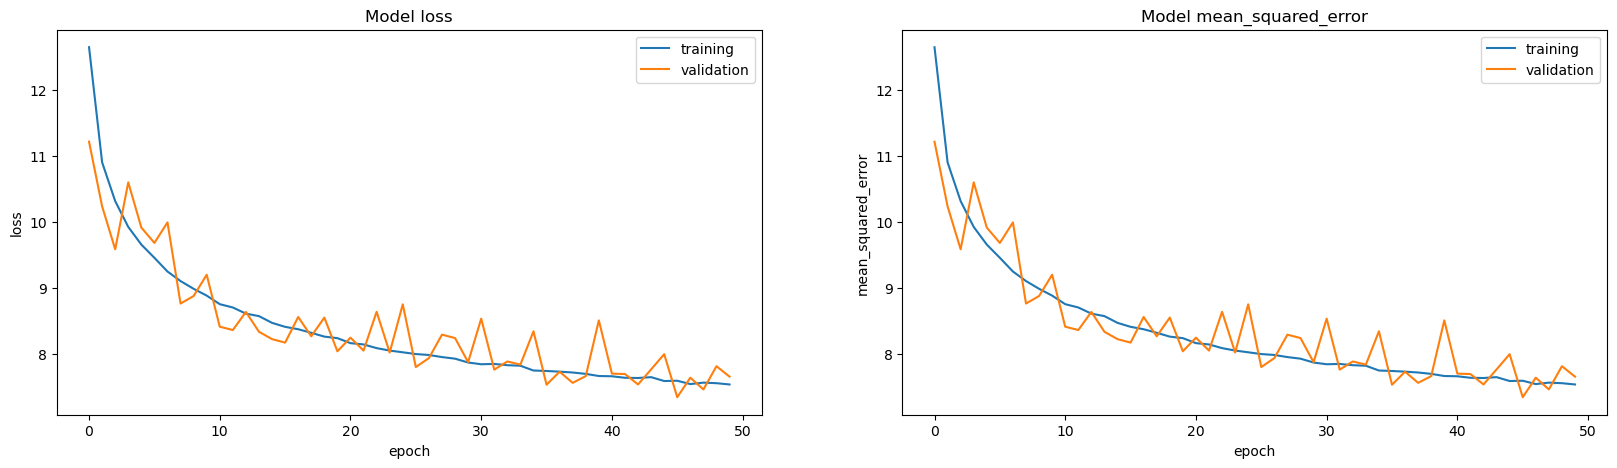

In [21]:
model = models.Sequential()

model.add(layers.Dense(units=36, activation='relu', input_shape = (36,)))
model.add(layers.Dense(units=72, activation='relu'))
model.add(layers.Dense(units=144, activation='relu'))
model.add(layers.Dense(units=1, activation='relu'))

train_and_evaluate(model, x_train, y_train, x_test, y_test, epochs = 50)

In [22]:
model.save('./board_cost_model_36x72x144x1.h5')

/Users/s.vanwaard/miniconda3/envs/minai/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
model3 = models.Sequential()

model3.add(layers.Dense(units=36, activation='relu', input_shape = (36,)))
model3.add(layers.Dense(units=72, activation='relu'))
model3.add(layers.Dense(units=144, activation='relu'))
model3.add(layers.Dense(units=144, activation='relu'))
model3.add(layers.Dense(units=144, activation='relu'))
model3.add(layers.Dense(units=1, activation='relu'))

train_and_evaluate(model3, x_train, y_train, x_test, y_test, epochs = 200)

Epoch 1/500
10416/10416 [==============================] - 21s 2ms/step - loss: 12.7625 - mean_squared_error: 12.7625 - val_loss: 10.8538 - val_mean_squared_error: 10.8538
Epoch 2/500
10416/10416 [==============================] - 22s 2ms/step - loss: 10.9002 - mean_squared_error: 10.9002 - val_loss: 11.3174 - val_mean_squared_error: 11.3174
Epoch 3/500
10416/10416 [==============================] - 18s 2ms/step - loss: 10.2191 - mean_squared_error: 10.2191 - val_loss: 10.0995 - val_mean_squared_error: 10.0995
Epoch 4/500
10416/10416 [==============================] - 17s 2ms/step - loss: 9.8408 - mean_squared_error: 9.8408 - val_loss: 9.1913 - val_mean_squared_error: 9.1913
Epoch 5/500
10416/10416 [==============================] - 17s 2ms/step - loss: 9.5741 - mean_squared_error: 9.5741 - val_loss: 9.0802 - val_mean_squared_error: 9.0802
Epoch 6/500
10416/10416 [==============================] - 19s 2ms/step - loss: 9.3764 - mean_squared_error: 9.3764 - val_loss: 8.8443 - val_mean_sq

KeyboardInterrupt: 

In [26]:
model3.save('./board_cost_model_36x72x144x144x144x1.h5')

/Users/s.vanwaard/miniconda3/envs/minai/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
